### Import libraries:

In [41]:
##pip install xgboost

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import matplotlib.colors as mcolors
from sklearn.metrics import davies_bouldin_score


### Import Data:

In [3]:
## from google.colab import drive
## drive.mount('/content/drive', force_remount=True)
## file_path = '/content/drive/My Drive/clean_final_data_utf_8.csv'
## df = pd.read_csv(file_path)


In [2]:
df = pd.read_excel('clean_final_data.xlsx')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40341 entries, 0 to 40340
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Type             40341 non-null  object        
 1   Area             40341 non-null  object        
 2   City             40341 non-null  object        
 3   Street           40341 non-null  object        
 4   Address          40341 non-null  object        
 5   Number of Rooms  40341 non-null  float64       
 6   Size             40341 non-null  int64         
 7   Personal Link    40341 non-null  object        
 8   Date Post        40341 non-null  datetime64[ns]
 9   Price            40341 non-null  int64         
 10  Phone Number     40341 non-null  object        
 11  Floor            40341 non-null  object        
 12  Property Tax     40341 non-null  int64         
 13  House Committee  40341 non-null  int64         
 14  Text             40341 non-null  objec

In [3]:
# Assuming 'data' is your DataFrame

df.rename(columns={
    'מרפסת': 'Balcony',
    'חניה': 'Parking',
    'מעלית': 'Elevator',
    'מזגן': 'Air_Conditioner',
    'מחסן': 'Storage',
    'משופצת': 'Renovated',
    'מרפסת שמש': 'Sun_Balcony'
}, inplace=True)


In [4]:
data_filtered = df


In [9]:
data_filtered


,Type,Area,City,Street,Address,Number of Rooms,Size,Personal Link,Date Post,Price,...,Name,Balcony,Parking,Elevator,Air_Conditioner,Storage,Renovated,Sun_Balcony,Year,Month
0,דירה,תל אביב,תל אביב יפו,מעוז אביב א,בני אפרים 207,3.0,96,https://www.ad.co.il/ad/15114422,2023-02-01,9000,...,שולי,0,0,0,1,0,0,0,2023,2
1,דירה,תל אביב,תל אביב יפו,הצפון הישן החלק המרכזי,ארבע ארצות 9,2.0,65,https://www.ad.co.il/ad/15118590,2023-02-01,8250,...,מיכאל,1,0,1,1,0,1,1,2023,2
2,דירה,תל אביב,תל אביב יפו,יפו ד,שדרות ירושלים 211,3.0,60,https://www.ad.co.il/ad/15118380,2023-02-01,4300,...,ilana,0,1,0,1,0,0,0,2023,2
3,דירה,תל אביב,תל אביב יפו,התקווה,הרטוב 11,3.0,65,https://www.ad.co.il/ad/15118234,2023-02-01,4700,...,יובל,0,1,0,1,0,1,0,2023,2
4,דירה,תל אביב,תל אביב יפו,נוה שרת,"אח""י דקר 25",4.0,95,https://www.ad.co.il/ad/15118661,2023-02-01,6500,...,iness,0,0,1,1,0,1,0,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40336,דירה,תל אביב,תל אביב יפו,רמת אביב ג,אבא אחימאיר 5,4.0,80,https://www.ad.co.il/ad/11476078,2020-10-31,6500,...,מיטל,0,1,1,1,0,0,0,2020,10
40337,דירה,תל אביב,תל אביב יפו,רמת אביב ג,אברהם בויאר 14,5.0,120,https://www.ad.co.il/ad/11476741,2020-10-31,10500,...,יוסי,0,1,1,1,1,1,0,2020,10
40338,סטודיו/לופט,תל אביב,תל אביב יפו,מונטיפיורי,יוסף קארו 7,1.5,30,https://www.ad.co.il/ad/11473786,2020-10-31,3000,...,ירדן,0,1,1,1,0,1,0,2020,10
40339,דירה,תל אביב,תל אביב יפו,המשתלה,משה וילנסקי 45,5.0,110,https://www.ad.co.il/ad/11473907,2020-10-31,8500,...,אורי,1,1,1,1,1,0,1,2020,10


### Removing irrelevant columns:

In [5]:
def get_season(date):
    month = date.month
    # הגדרת חודשי עונות השנה בצפון הכדור הארץ
    if month in [12, 1, 2]:
        return 'Winter'  # חורף
    elif month in [3, 4, 5]:
        return 'Spring'  # אביב
    elif month in [6, 7, 8]:
        return 'Summer'  # קיץ
    else:
        return 'Autumn'  # סתיו


In [6]:
data_filtered['Date Post'] = pd.to_datetime(df['Date Post'], dayfirst=True)
data_filtered['Season'] = data_filtered['Date Post'].apply(get_season)


### Creating complex variables:

In [7]:
data_filtered['Price_per_sqm'] = data_filtered['Price'] / data_filtered['Size']
data_filtered['Size_per_room'] = data_filtered['Size'] / data_filtered['Number of Rooms']
data_filtered['Price_per_Sqm_X_Size'] = data_filtered['Price_per_sqm'] * data_filtered['Size']
data_filtered['Price_per_sqm_X_Rooms'] = data_filtered['Price_per_sqm'] * data_filtered['Number of Rooms']


### Visualizations for the complex variables:

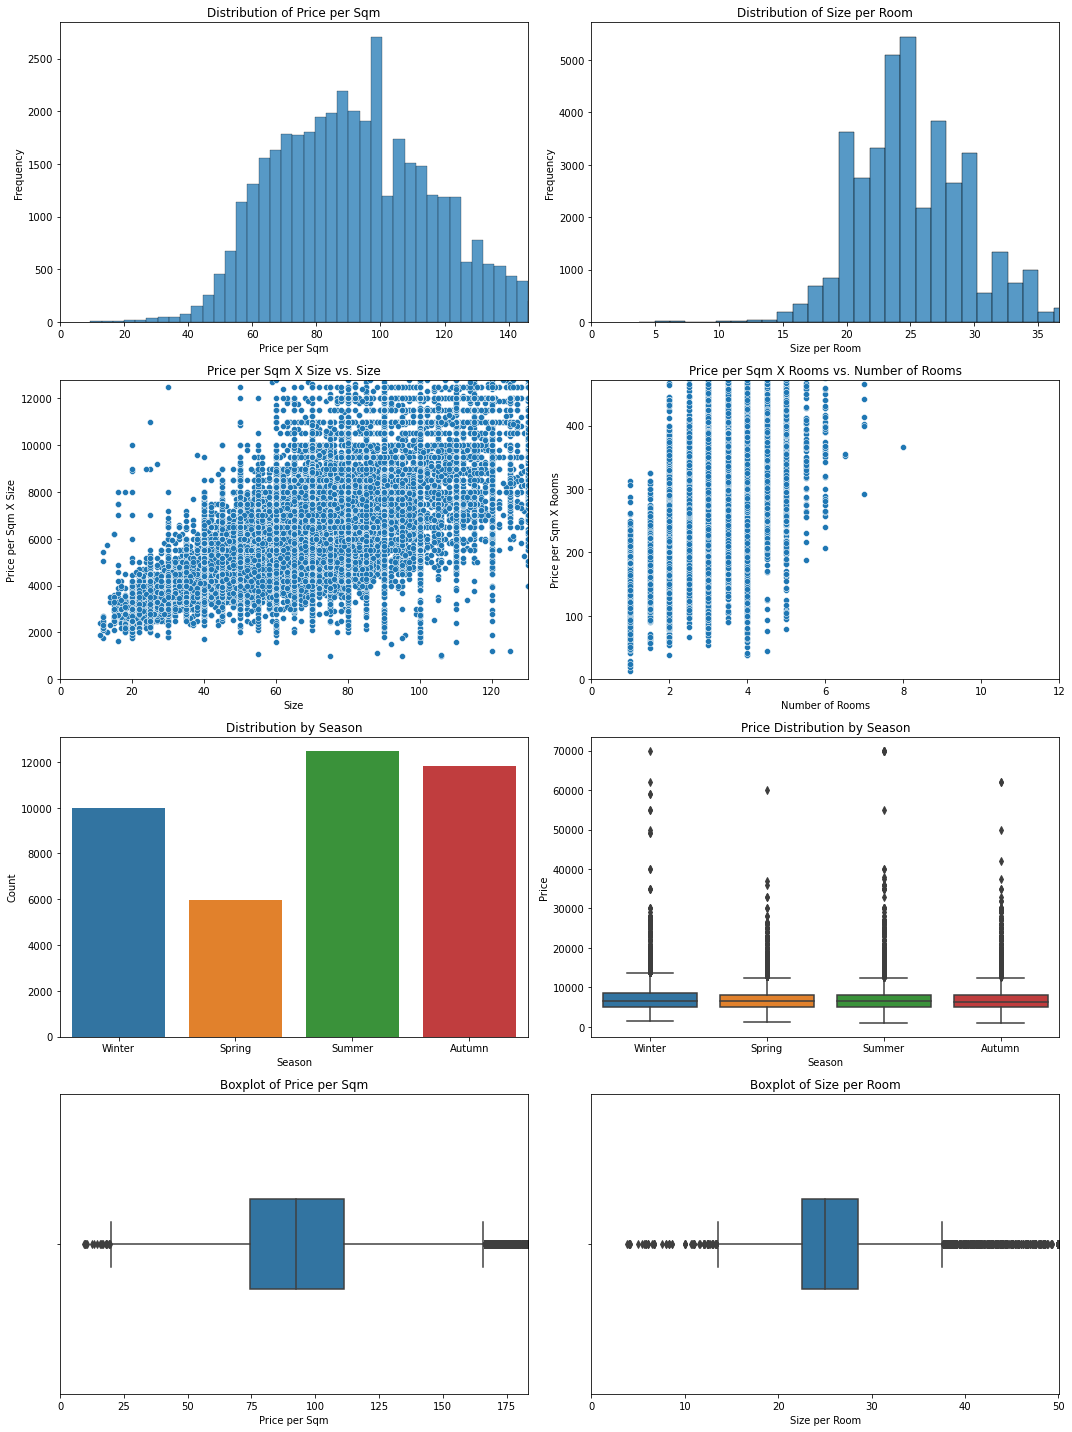

In [43]:
# Define the percentile value
percentile = 95 # or any other value you're interested in

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# Histogram of Price per Sqm
sns.histplot(data_filtered['Price_per_sqm'], ax=axs[0, 0], bins=140)
axs[0, 0].set_xlim(0, np.percentile(data_filtered['Price_per_sqm'], percentile))
axs[0, 0].set_title('Distribution of Price per Sqm')
axs[0, 0].set_xlabel('Price per Sqm')
axs[0, 0].set_ylabel('Frequency')

# Histogram of Size per Room
sns.histplot(data_filtered['Size_per_room'], ax=axs[0, 1], bins=80)
axs[0, 1].set_xlim(0, np.percentile(data_filtered['Size_per_room'], percentile))
axs[0, 1].set_title('Distribution of Size per Room')
axs[0, 1].set_xlabel('Size per Room')
axs[0, 1].set_ylabel('Frequency')

# Scatter plot of Price Times Size vs. Size
sns.scatterplot(x='Size', y='Price_per_Sqm_X_Size', data=data_filtered, ax=axs[1, 0])
axs[1, 0].set_xlim(0, np.percentile(data_filtered['Size'], percentile))
axs[1, 0].set_ylim(0, np.percentile(data_filtered['Price_per_Sqm_X_Size'], percentile))
axs[1, 0].set_title('Price per Sqm X Size vs. Size')
axs[1, 0].set_xlabel('Size')
axs[1, 0].set_ylabel('Price per Sqm X Size')

# Scatter plot of Price per Sqm Times Rooms vs. Number of Rooms
sns.scatterplot(x='Number of Rooms', y='Price_per_sqm_X_Rooms', data=data_filtered, ax=axs[1, 1])
axs[1, 1].set_xlim(0, data_filtered['Number of Rooms'].max())
axs[1, 1].set_ylim(0, np.percentile(data_filtered['Price_per_sqm_X_Rooms'], percentile))
axs[1, 1].set_title('Price per Sqm X Rooms vs. Number of Rooms')
axs[1, 1].set_xlabel('Number of Rooms')
axs[1, 1].set_ylabel('Price per Sqm X Rooms')

# Season distribution as count plot
sns.countplot(x='Season', data=data_filtered, ax=axs[2, 0])
axs[2, 0].set_title('Distribution by Season')
axs[2, 0].set_xlabel('Season')
axs[2, 0].set_ylabel('Count')

# For example, we can set it to 95 or 99 for the 95th or 99th percentile.
percentile = 99

# A boxplot to show price distribution across different seasons
sns.boxplot(x='Season', y='Price', data=data_filtered, ax=axs[2, 1])
axs[2, 1].set_title('Price Distribution by Season')
axs[2, 1].set_xlabel('Season')

# Boxplot of Price per Sqm
sns.boxplot(data=data_filtered, x='Price_per_sqm', ax=axs[3, 0], width=0.3)
axs[3, 0].set_xlim(0, np.percentile(data_filtered['Price_per_sqm'], percentile))
axs[3, 0].set_title('Boxplot of Price per Sqm')
axs[3, 0].set_xlabel('Price per Sqm')

# Boxplot of Size per Room
sns.boxplot(data=data_filtered, x='Size_per_room', ax=axs[3, 1], width=0.3)
axs[3, 1].set_xlim(0, np.percentile(data_filtered['Size_per_room'], percentile))
axs[3, 1].set_title('Boxplot of Size per Room')
axs[3, 1].set_xlabel('Size per Room')

plt.tight_layout()
plt.show()

<ipython-input-14-83f77f9b7f49>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_filtered.corr()


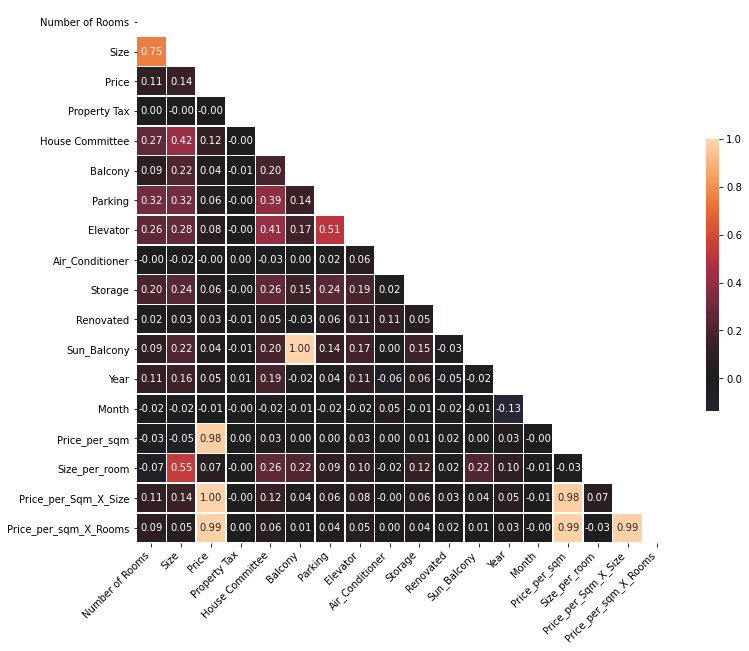

In [14]:
# Calculate the correlation matrix
corr = data_filtered.corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Optional: Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [8]:
# רשימת העמודות שרוצים להסיר
columns_to_drop = ['Area', 'City', 'Personal Link', 'Phone Number', 'Name']

# הסרת העמודות מהדאטה פריים
data_filtered = df.drop(columns=columns_to_drop)


In [16]:
data_filtered


,Type,Street,Address,Number of Rooms,Size,Date Post,Price,Floor,Property Tax,House Committee,...,Storage,Renovated,Sun_Balcony,Year,Month,Season,Price_per_sqm,Size_per_room,Price_per_Sqm_X_Size,Price_per_sqm_X_Rooms
0,דירה,מעוז אביב א,בני אפרים 207,3.0,96,2023-02-01,9000,1 מתוך 3,400,100,...,0,0,0,2023,2,Winter,93.750000,32.000000,9000.0,281.250000
1,דירה,הצפון הישן החלק המרכזי,ארבע ארצות 9,2.0,65,2023-02-01,8250,3 מתוך 5,100,200,...,0,1,1,2023,2,Winter,126.923077,32.500000,8250.0,253.846154
2,דירה,יפו ד,שדרות ירושלים 211,3.0,60,2023-02-01,4300,2 מתוך 3,160,50,...,0,0,0,2023,2,Winter,71.666667,20.000000,4300.0,215.000000
3,דירה,התקווה,הרטוב 11,3.0,65,2023-02-01,4700,4 מתוך 4,175,80,...,0,1,0,2023,2,Winter,72.307692,21.666667,4700.0,216.923077
4,דירה,נוה שרת,"אח""י דקר 25",4.0,95,2023-02-01,6500,1 מתוך 4,250,225,...,0,1,0,2023,2,Winter,68.421053,23.750000,6500.0,273.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40336,דירה,רמת אביב ג,אבא אחימאיר 5,4.0,80,2020-10-31,6500,3 מתוך 6,425,250,...,0,0,0,2020,10,Autumn,81.250000,20.000000,6500.0,325.000000
40337,דירה,רמת אביב ג,אברהם בויאר 14,5.0,120,2020-10-31,10500,5 מתוך 7,575,400,...,1,1,0,2020,10,Autumn,87.500000,24.000000,10500.0,437.500000
40338,סטודיו/לופט,מונטיפיורי,יוסף קארו 7,1.5,30,2020-10-31,3000,4 מתוך 7,75,140,...,0,1,0,2020,10,Autumn,100.000000,20.000000,3000.0,150.000000
40339,דירה,המשתלה,משה וילנסקי 45,5.0,110,2020-10-31,8500,4 מתוך 8,930,500,...,1,0,1,2020,10,Autumn,77.272727,22.000000,8500.0,386.363636


In [17]:
data_filtered['Street'] = data_filtered['Street'].apply(lambda x: x[::-1] if isinstance(x, str) else x)


<ipython-input-44-d85c0bbd291e>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  property_count_pivot = property_count_by_area.pivot('Street', 'Property Count', 'Property Count')


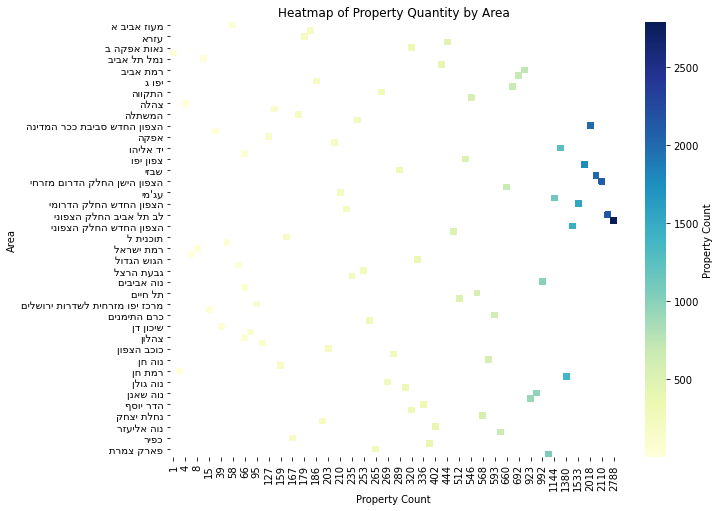

<ipython-input-44-d85c0bbd291e>:33: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  average_price_pivot = average_price_by_area.pivot('Street', 'Price', 'Price')


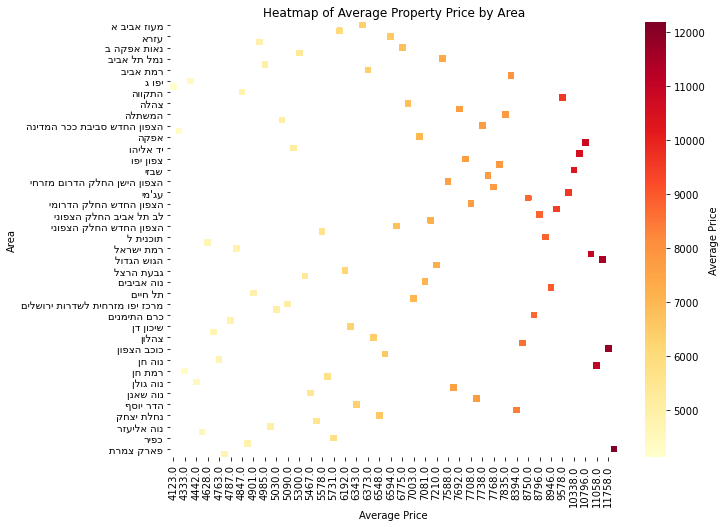

In [44]:
# Function to reverse the Hebrew text for correct display
def reverse_hebrew(text):
    return text[::-1]

# Apply the function to reverse the Hebrew text for the 'Street' column
data_filtered['Street'] = data_filtered['Street'].apply(reverse_hebrew)

# Aggregate the data to count the number of properties in each area
property_count_by_area = data_filtered.groupby('Street').size().reset_index(name='Property Count')

# Pivot the data to create a matrix-like format suitable for heatmap
property_count_pivot = property_count_by_area.pivot('Street', 'Property Count', 'Property Count')

# Creating the heatmap for quantity of properties without annotations
plt.figure(figsize=(10, 8))  # Increase the figure size if needed
sns.heatmap(property_count_pivot, cmap="YlGnBu", cbar_kws={'label': 'Property Count'})
plt.title('Heatmap of Property Quantity by Area')
plt.xlabel('Property Count')
plt.ylabel('Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal for better readability
plt.show()

# Assuming 'Price' is a column in 'data_filtered' and you want to create a heatmap for average prices as well

# Aggregate the data to get the average price of properties in each area
average_price_by_area = data_filtered.groupby('Street')['Price'].mean().reset_index()

# Round the average price to no decimal places to avoid clutter on the x-axis
average_price_by_area['Price'] = average_price_by_area['Price'].round(0)

# Pivot the data to create a matrix-like format suitable for heatmap
average_price_pivot = average_price_by_area.pivot('Street', 'Price', 'Price')

# Creating the heatmap for prices without annotations
plt.figure(figsize=(10, 8))  # Increase the figure size if needed
sns.heatmap(average_price_pivot, cmap="YlOrRd", cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Property Price by Area')
plt.xlabel('Average Price')
plt.ylabel('Area')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal for better readability
plt.show()

### Cutting the ranges and dropping exceptions before clustering:

In [9]:
# חתכת הטווחים לפני הקלסטרינג
data_filtered = data_filtered[data_filtered['Price_per_sqm'] <= 500]
data_filtered = data_filtered[data_filtered['Size_per_room'] <= 100]
data_filtered = data_filtered[data_filtered['Price_per_Sqm_X_Size'] <= 150000]  
data_filtered = data_filtered[data_filtered['Price_per_sqm_X_Rooms'] <= 5000]


In [20]:
data_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40282 entries, 0 to 40340
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Type                   40282 non-null  object        
 1   Street                 40282 non-null  object        
 2   Address                40282 non-null  object        
 3   Number of Rooms        40282 non-null  float64       
 4   Size                   40282 non-null  int64         
 5   Date Post              40282 non-null  datetime64[ns]
 6   Price                  40282 non-null  int64         
 7   Floor                  40282 non-null  object        
 8   Property Tax           40282 non-null  int64         
 9   House Committee        40282 non-null  int64         
 10  Text                   40282 non-null  object        
 11  Balcony                40282 non-null  int64         
 12  Parking                40282 non-null  int64         
 13  E

### Elbow Method For Optimal k:

In [27]:
new_df = data_filtered.copy()  

In [28]:
le = LabelEncoder()
new_df['Season'] = le.fit_transform(new_df['Season'])
le = LabelEncoder()
new_df['Street'] = le.fit_transform(new_df['Street'])


In [29]:
# Handling infinite values and filling missing values
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.fillna(0, inplace=True)

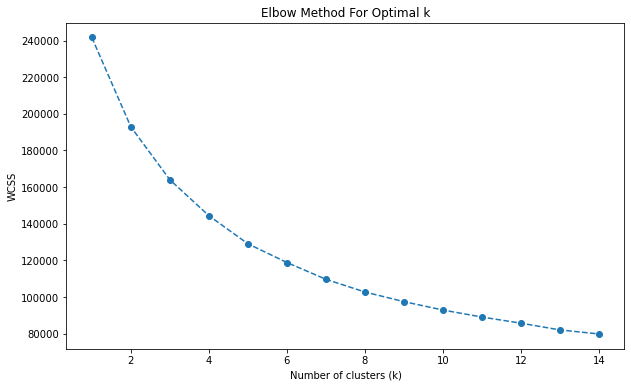

In [21]:
# Scaling the data
scaler = StandardScaler()
features = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms','Street','Season']
scaled_features = scaler.fit_transform(new_df[features])

# Calculating WCSS for each value of k
wcss = []
for i in range(1, 15):  # Checking values of k from 1 to 14
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Displaying the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


#### Silhouette Score for optimal K:

In [22]:
# נניח שיש לך עמודת מחיר ב-DataFrame שלך שיכולה לשמש כיעד למודל
X = new_df[features]  # הפיצ'רים ללא היעד
y = new_df['Price']  # היעד, נניח שהוא מחיר

# ערכי k לבדיקה
k_values = [4, 5, 6]

# החישוב של Silhouette Score עבור כל ערך של k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# מציאת הערך של k עם ה-Silhouette Score הגבוה ביותר
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print(f"Best k by Silhouette Score: {best_k} with a score of {best_score}")


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=4: 0.5538064071520878


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5: 0.5524366073293683


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=6: 0.54615273171012
Best k by Silhouette Score: 4 with a score of 0.5538064071520878


### XGBoost for checking the importance of the features to check which visualizations to create:

                 Feature  Importance
2   Price_per_Sqm_X_Size    0.969336
1          Size_per_room    0.016459
3  Price_per_sqm_X_Rooms    0.008304
0          Price_per_sqm    0.003707
4                 Season    0.001198
5                 Street    0.000995


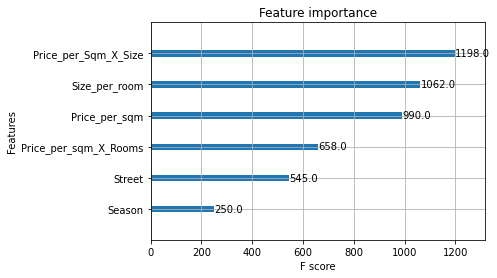

In [23]:
# רשימה של שמות העמודות/פיצ'רים שאתה רוצה לבדוק
features = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Season', 'Street']  

# נניח שיש לך עמודת מחיר ב-DataFrame שלך שיכולה לשמש כיעד למודל
X = new_df[features]  # הפיצ'רים ללא היעד
y = new_df['Price']  # היעד, נניח שהוא מחיר

# יצירת מודל XGBoost
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X, y)

# הדפסת חשיבות הפיצ'רים
feature_importances = model.feature_importances_

# הפיכת חשיבות הפיצ'רים ל-DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# ויזואליזציה של חשיבות הפיצ'רים
plot_importance(model)
plt.show()


### K-means Clustering:

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


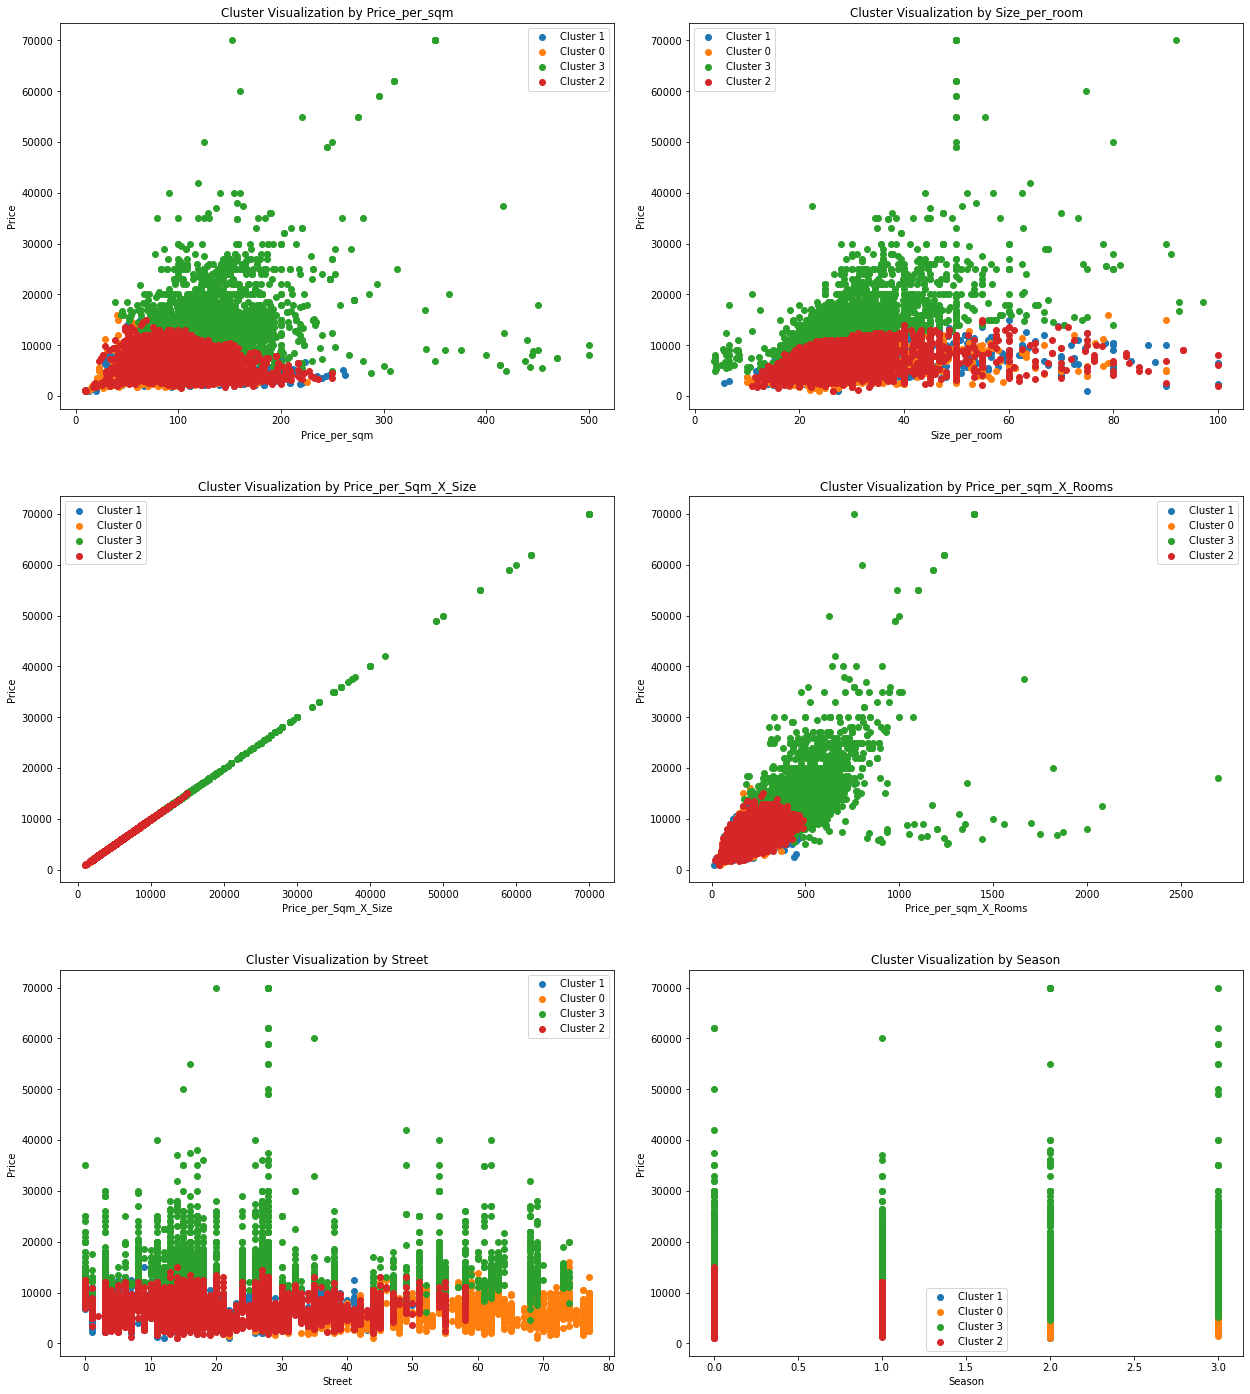

In [40]:
optimal_k = 4

# Perform clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
new_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Combine all features for visualization
all_features_for_visualization = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Street', 'Season']

fig, axes = plt.subplots(3, 2, figsize=(18, 20))  # Adjusted for 6 features (3x2 grid)
axes = axes.flatten()

# Loop through each feature for visualization
for i, feature in enumerate(all_features_for_visualization):
    for cluster in new_df['Cluster'].unique():
        subset = new_df[new_df['Cluster'] == cluster]
        # For categorical features like 'Season' and 'Street', ensure they're numeric or preprocessed appropriately for visualization
        axes[i].scatter(subset[feature], subset['Price'], label=f'Cluster {cluster}')  # Assuming 'Price' is the target feature
    axes[i].legend()
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')  # Adjust if visualizing against a different feature
    axes[i].set_title(f'Cluster Visualization by {feature}')

# Adjust layout with increased vertical padding for readability
plt.tight_layout(pad=3.0, h_pad=4.0, w_pad=2.0)  # Adjust h_pad and w_pad for spacing

plt.show()


#### K-means Clustering Evaluation:

In [36]:
kmeans = KMeans(n_clusters=4) 
kmeans_labels = kmeans.fit_predict(X)
print("K-means Clustering:")
print("Silhouette Score:", silhouette_score(X, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, kmeans_labels))

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means Clustering:
Silhouette Score: 0.5532886015691748
Davies-Bouldin Index: 0.5497998981184187


### DBSCAN Clustering:

#### Find the right 'ε':

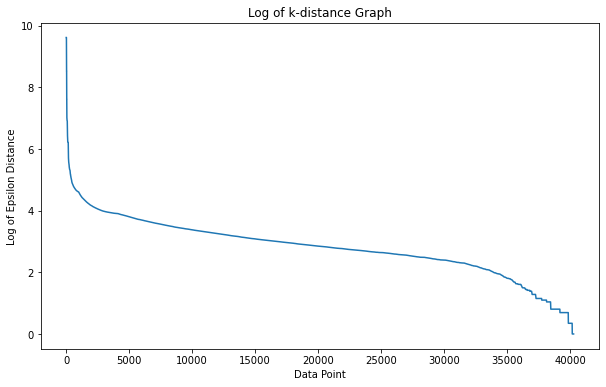

In [26]:
MinPts = 15

# יצירת אובייקט NearestNeighbors והתאמה לנתונים
nn = NearestNeighbors(n_neighbors=MinPts)
nn.fit(X)

# חישוב המרחקים והאינדקסים של השכנים הקרובים
distances, indices = nn.kneighbors(X)

# מיון המרחקים של השכן ה-k הקרוב ביותר בסדר יורד
distanceDec = sorted(distances[:,MinPts-1], reverse=True)

# הצגת המרחקים בגרף
plt.figure(figsize=(10,6))
plt.plot(list(range(1,len(distanceDec)+1)), np.log(distanceDec))
plt.title('Log of k-distance Graph')
plt.xlabel('Data Point')
plt.ylabel('Log of Epsilon Distance')
plt.show()


In [27]:
epsilon_value = np.exp(5)
print("ערך ה-epsilon המוצע הוא:", epsilon_value)

ערך ה-epsilon המוצע הוא: 148.4131591025766


 2    10612
 4     9964
 0     8174
-1     6178
 1     4675
 5      236
 7      217
 3      190
 8       27
 6        9
Name: Cluster, dtype: int64


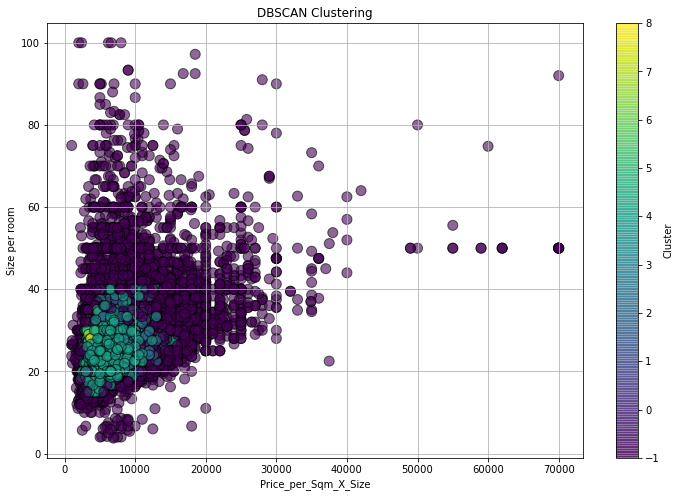

In [31]:
# Assuming 'features_to_scale' includes all the features you want to perform clustering on
features_to_scale = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Street', 'Season']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df[features_to_scale])

# DBSCAN setup
dbscan = DBSCAN(eps=0.5, min_samples=15)
new_df['Cluster'] = dbscan.fit_predict(scaled_features)

# Review cluster counts
print(new_df['Cluster'].value_counts())

# Visualization improvements
plt.figure(figsize=(12, 8))  # Increased figure size
plt.scatter(new_df['Price_per_Sqm_X_Size'], new_df['Size_per_room'], c=new_df['Cluster'],
            cmap='viridis', marker='o', edgecolor='k', s=100, alpha=0.6)  # Alpha for blending, s for size of markers
plt.title('DBSCAN Clustering')
plt.xlabel('Price_per_Sqm_X_Size')
plt.ylabel('Size per room')
plt.colorbar(label='Cluster')
plt.grid(True)  # Adding grid for better readability
plt.show()


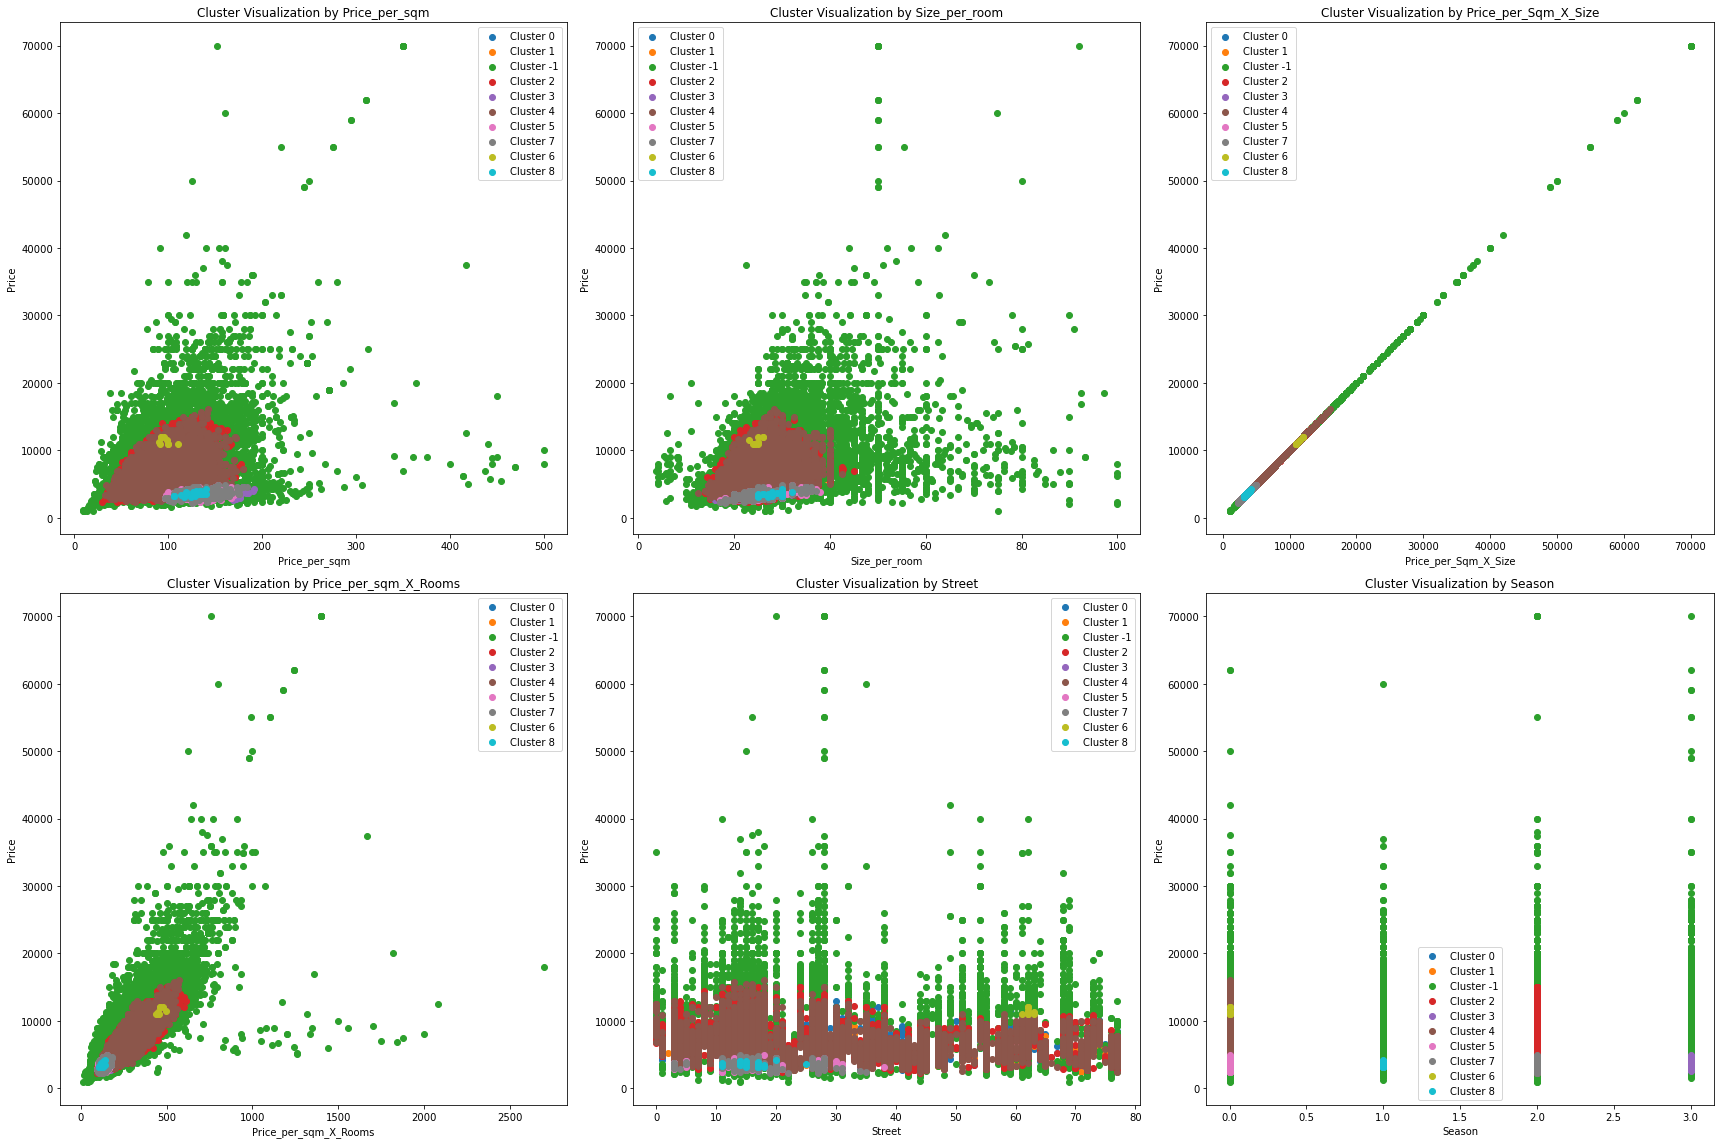

In [34]:
# Assuming 'features_to_scale' includes all the features you want to perform clustering on
features_to_scale = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Street', 'Season']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df[features_to_scale])

# DBSCAN setup
dbscan = DBSCAN(eps=0.5, min_samples=15)
new_df['Cluster'] = dbscan.fit_predict(scaled_features)

# Now for the visualization, assuming 'Price' is a column in your DataFrame
# Adjust the overall figure size for visibility
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))  # 2 rows, 3 columns

for i, feature in enumerate(features_to_scale):
    # Calculate row and column index for the current subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    for cluster in new_df['Cluster'].unique():
        subset = new_df[new_df['Cluster'] == cluster]
        ax.scatter(subset[feature], subset['Price'], label=f'Cluster {cluster}')
    
    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')
    ax.set_title(f'Cluster Visualization by {feature}')

plt.tight_layout()  # Adjust layout to not overlap plots
plt.show()

#### DBSCAN Clustering Evaluation:

In [35]:
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)
print("\nDBSCAN Clustering:")
print("Silhouette Score:", silhouette_score(X, dbscan_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, dbscan_labels))


DBSCAN Clustering:
Silhouette Score: -0.4875476694348091
Davies-Bouldin Index: 2.7431996421537086


### Hierarchical Clustering:

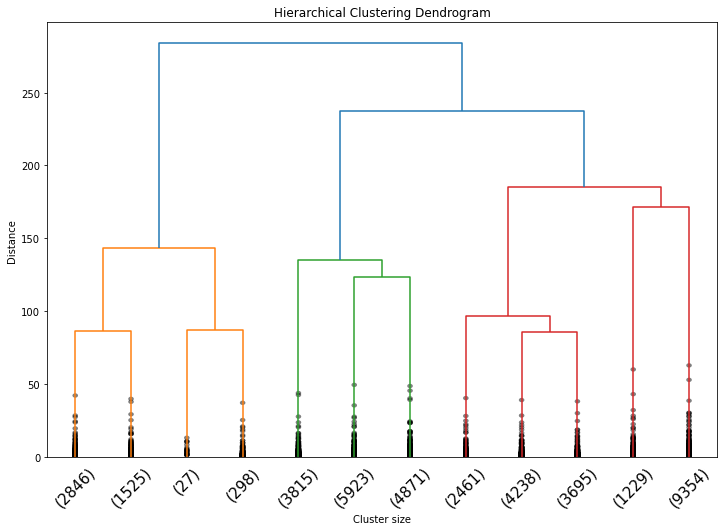

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


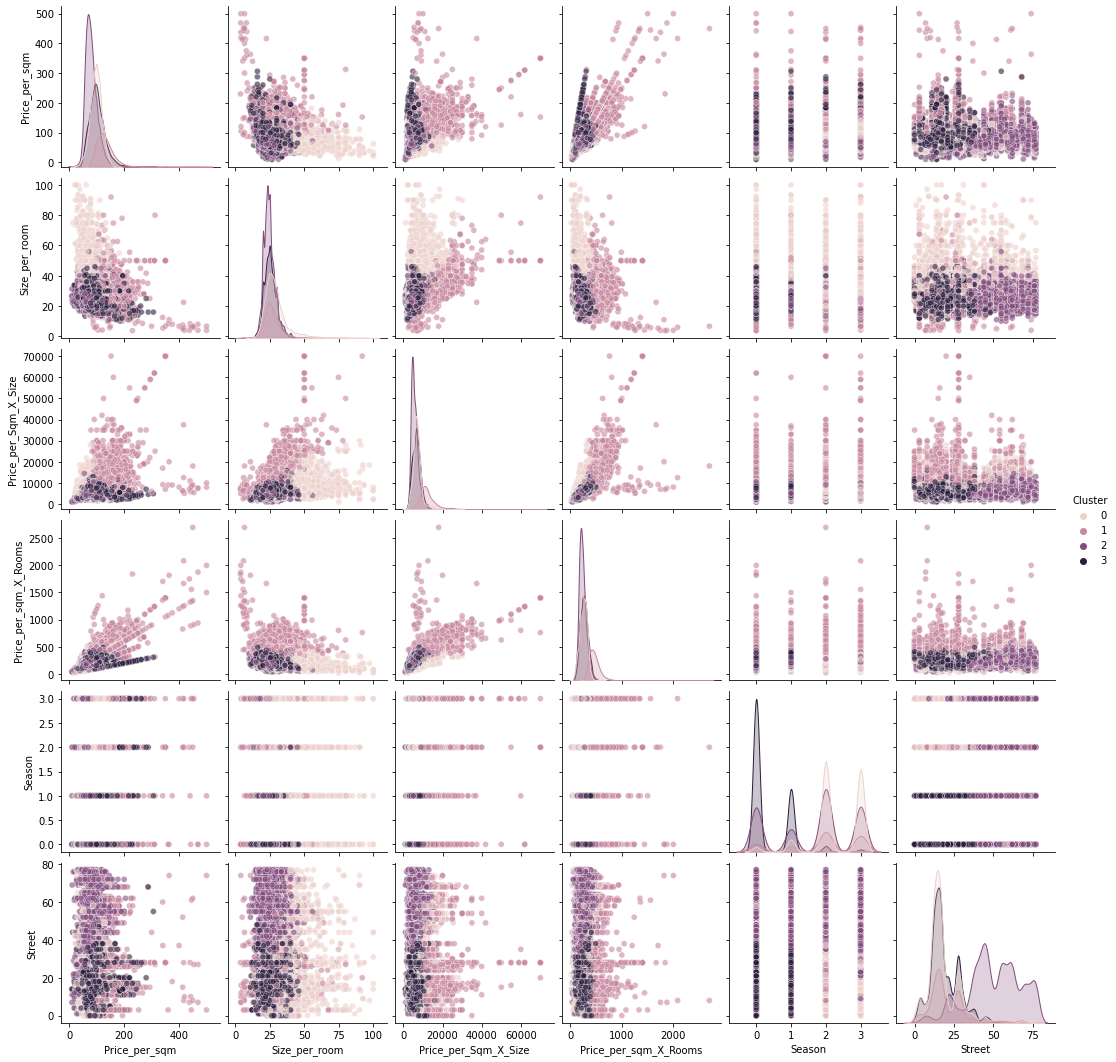

In [15]:
# Scale the Features
features_to_scale = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Season', 'Street']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df[features_to_scale])

# Perform Hierarchical Clustering
Z = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()
+
# Choose 4 clusters
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')

# Ensure the length of cluster labels matches the number of rows in DataFrame
new_df['Cluster'] = hc.fit_predict(scaled_features)

# Visualize the Clustering Result
sns.pairplot(new_df[features_to_scale + ['Cluster']], hue='Cluster', plot_kws={'alpha': 0.6})
plt.show()


C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


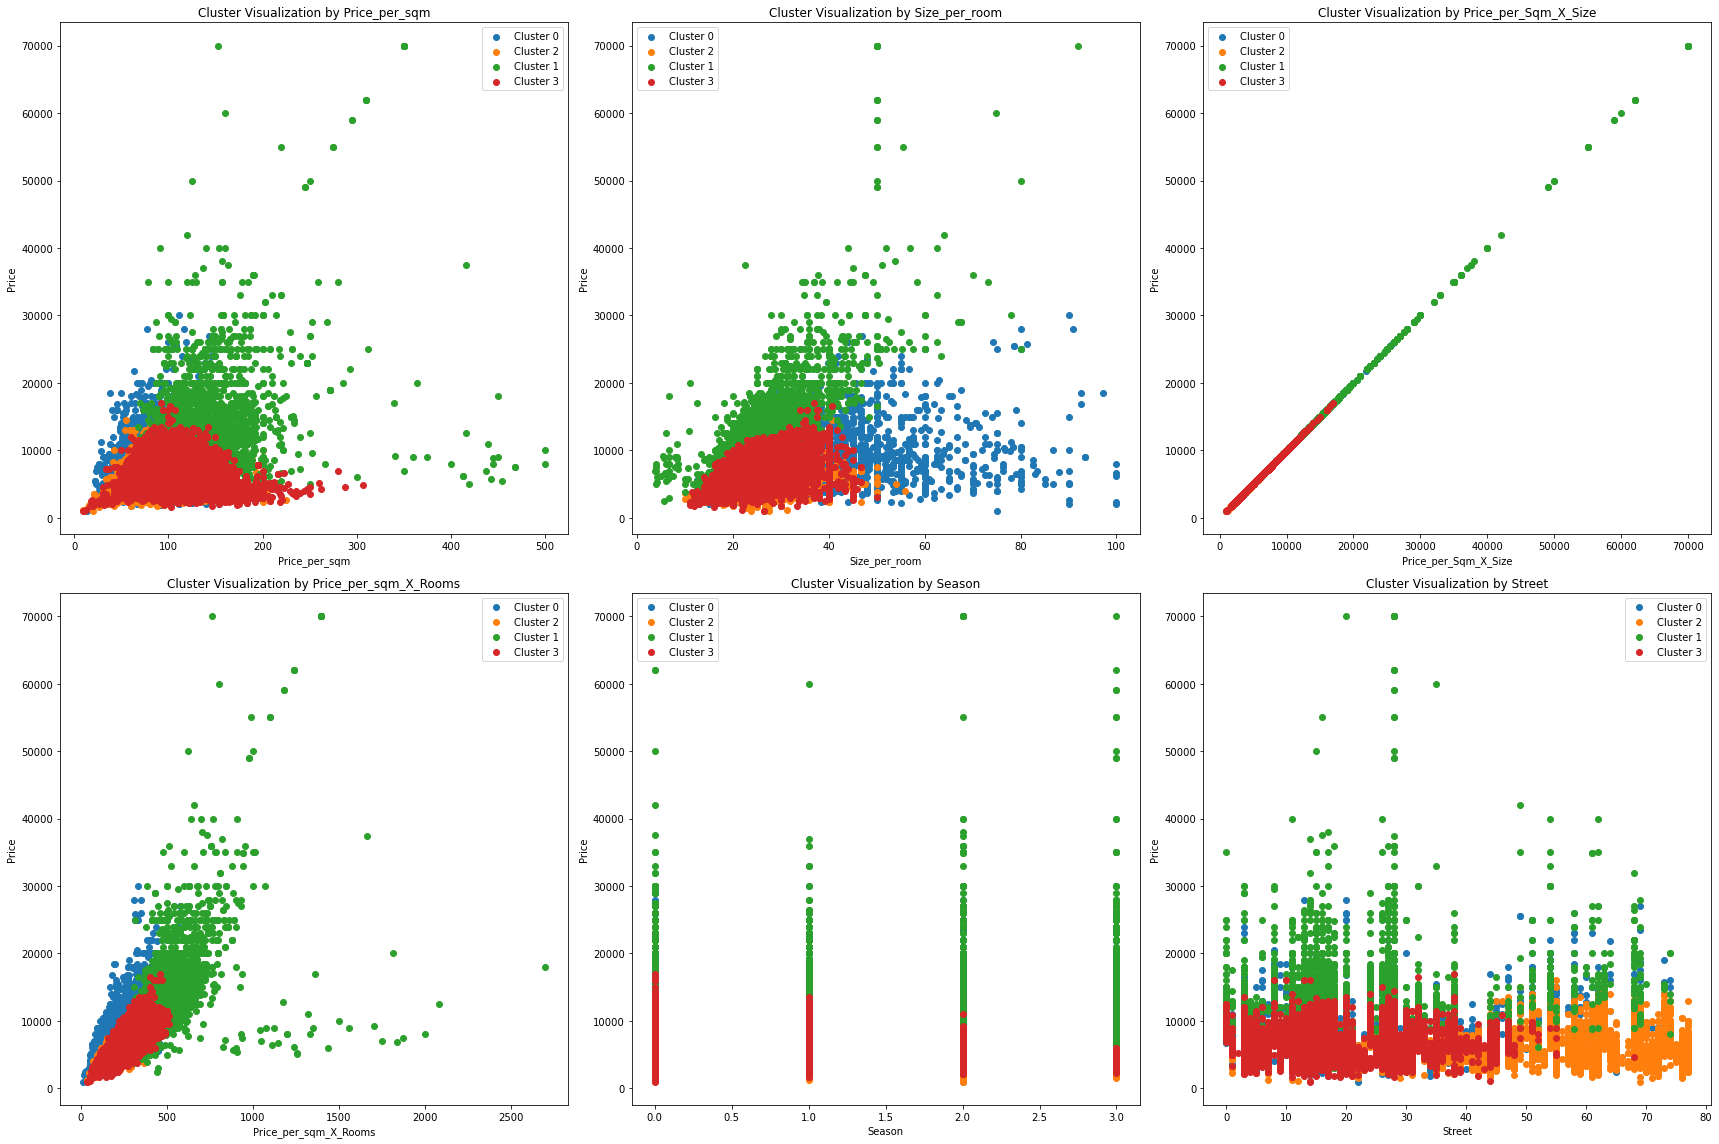

In [37]:
# Assuming 'features_to_scale' includes the features you're interested in, minus the 'Price'
features_to_scale = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms', 'Season', 'Street']

# Scale the Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_df[features_to_scale])

# Perform Hierarchical Clustering
n_clusters = 4
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
new_df['Cluster'] = hc.fit_predict(scaled_features)

# Visualization setup
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))  # Adjusted for a 2x3 grid

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Assuming 'Price' is another column in your DataFrame you want to plot against
# Remove 'Price' from 'features_to_scale' if it's there, or replace it with your target feature
for i, feature in enumerate(features_to_scale[:6]):  # Limiting to the first 6 for the 2x3 grid
    ax = axes[i]
    for cluster in new_df['Cluster'].unique():
        subset = new_df[new_df['Cluster'] == cluster]
        ax.scatter(subset[feature], subset['Price'], label=f'Cluster {cluster}')  # Replace 'Price' with your target feature if different

    ax.legend()
    ax.set_xlabel(feature)
    ax.set_ylabel('Price')  # Replace 'Price' with your target feature if different
    ax.set_title(f'Cluster Visualization by {feature}')

plt.tight_layout()
plt.show()

#### Hierarchical Clustering Evaluation:

In [18]:
features = ['Price_per_sqm', 'Size_per_room', 'Price_per_Sqm_X_Size', 'Price_per_sqm_X_Rooms','Street','Season']
X = new_df[features]  # הפיצ'רים ללא היעד
Z = linkage(X, 'ward')  # 'ward' הוא אחד השיטות לחישוב המרחק בין הקלסטרים
max_d = 140  # קבע את מרחק החיתוך לקביעת מספר הקלסטרים
hierarchical_labels = fcluster(Z, max_d, criterion='distance')
print("\nHierarchical Clustering:")
print("Silhouette Score:", silhouette_score(X, hierarchical_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X, hierarchical_labels))


Hierarchical Clustering:
Silhouette Score: 0.33754698923345644
Davies-Bouldin Index: 0.8557363776464809
